<a href="https://colab.research.google.com/github/cszafariqbal/cszafar/blob/master/Cement_Linear_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Question NO.2 Cement Strength Regression By using Linear Regression, Ridge, Lesso and Deep learning Model CNN

* Download The Datasets



In [2]:
!pip install opendatasets

In [67]:
import opendatasets as od
import pandas as pd
import numpy as np
import os

In [68]:
url = "https://www.kaggle.com/datasets/prathamtripathi/regression-with-neural-networking"
od.download(url)

Skipping, found downloaded files in "./regression-with-neural-networking" (use force=True to force download)


In [69]:
folder_path = "./regression-with-neural-networking"

In [70]:
os.listdir(folder_path)

['concrete_data.csv']

In [71]:
file_dir = folder_path + "/concrete_data.csv"

In [72]:
cement_df = pd.read_csv(file_dir)

In [73]:
cement_df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [74]:
cement_df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [75]:
cement_df.tail()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [76]:
cement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [77]:
cement_df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [78]:
cement_df.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [79]:
cement_df.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [80]:
cement_df.duplicated().sum()

25

In [81]:
cement_df.drop_duplicates(inplace=True)

In [82]:
cement_df.duplicated().sum()

0

#Exploratory Analysis & Visualization

In [83]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [84]:
cement_df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [85]:
fig = px.histogram(cement_df,
                   x='Cement',
                   marginal='box',
                   nbins=50,
                   title='Distribution of Cement')
fig.update_layout(bargap=0.1)
fig.show()

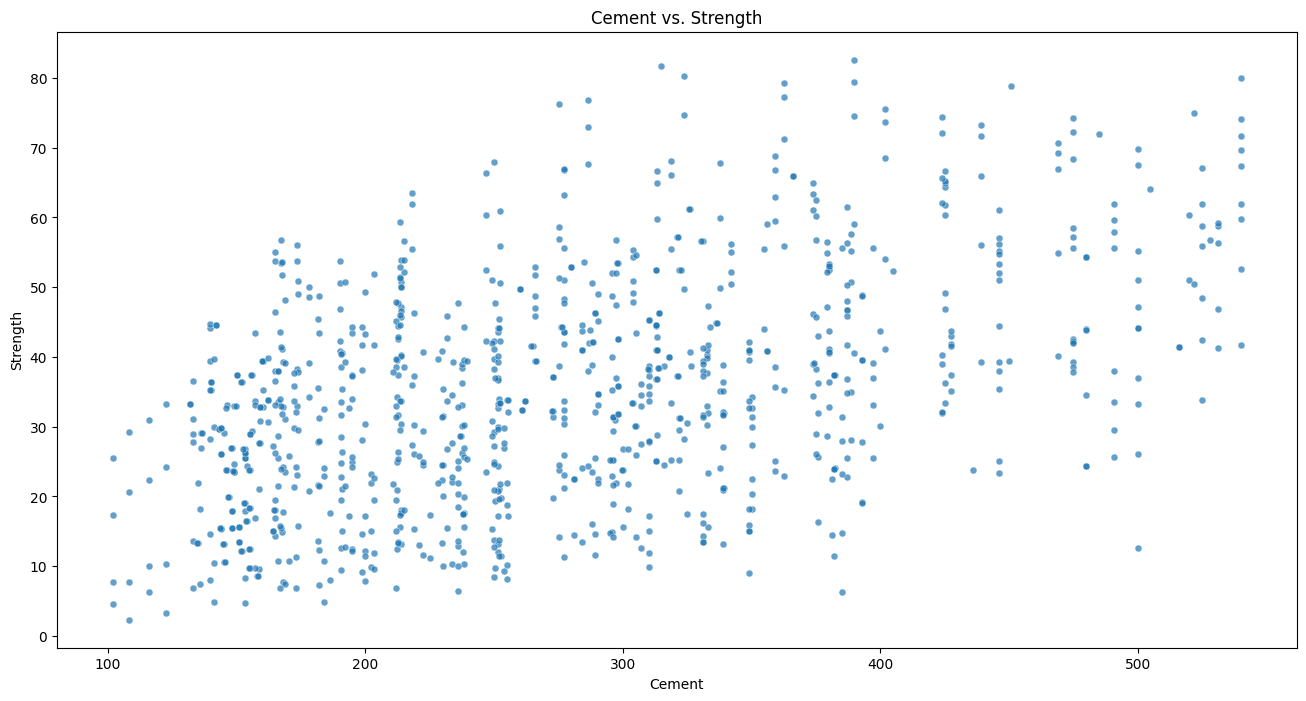

In [86]:
plt.figure(figsize=(16,8))
plt.title('Cement vs. Strength')
sns.scatterplot(data=cement_df, x='Cement', y='Strength', alpha=0.7, s=25);

In [87]:
fig = px.histogram(cement_df,
                   x=cement_df.Strength,
                   marginal='box',
                   nbins=50,
                  color_discrete_sequence=['red'],
                   title='Distribution of Strength')
fig.update_layout(bargap=0.1)
fig.show()

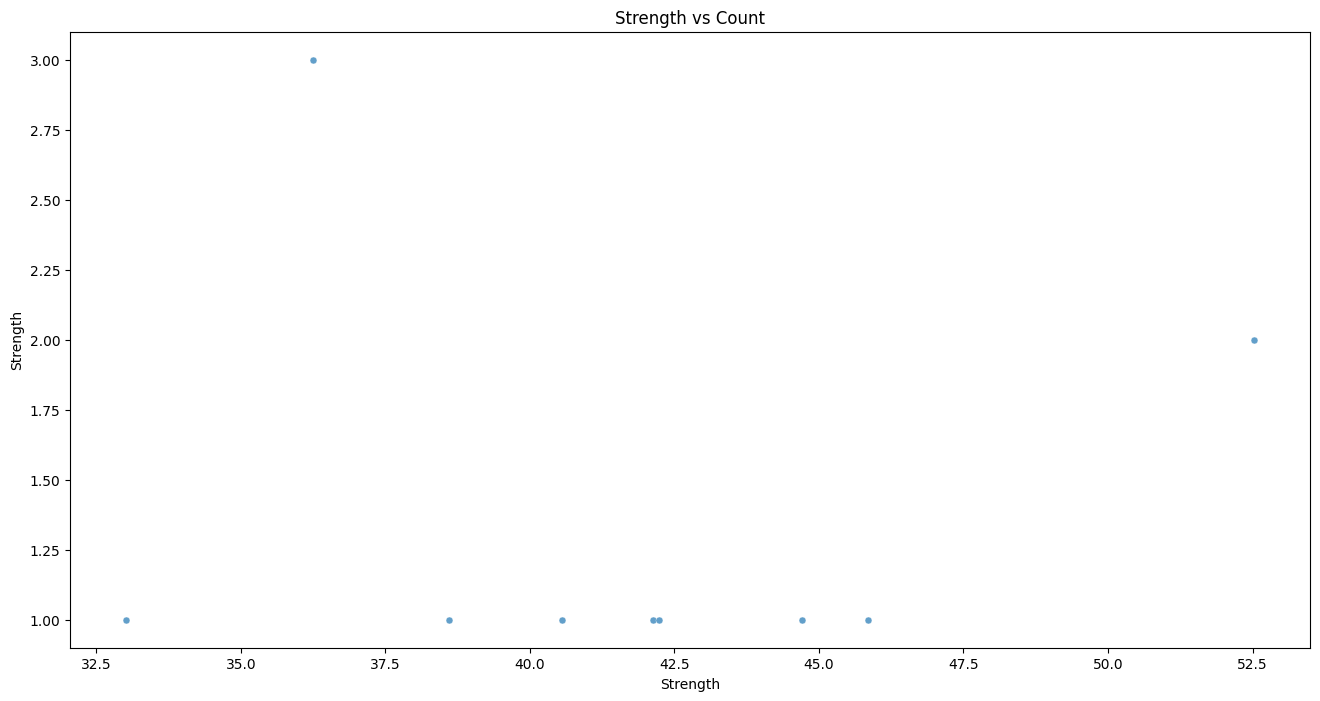

In [88]:
plt.figure(figsize=(16,8))
plt.title('Strength vs Count')
sns.scatterplot(data=cement_df, x='Strength', y=cement_df.Strength.value_counts(), alpha=0.7, s=25);

In [89]:
fig = px.histogram(cement_df,
                   x='Blast Furnace Slag',
                   marginal='box',
                   nbins=50,
                   title='Distribution of Cement')
fig.update_layout(bargap=0.1)
fig.show()

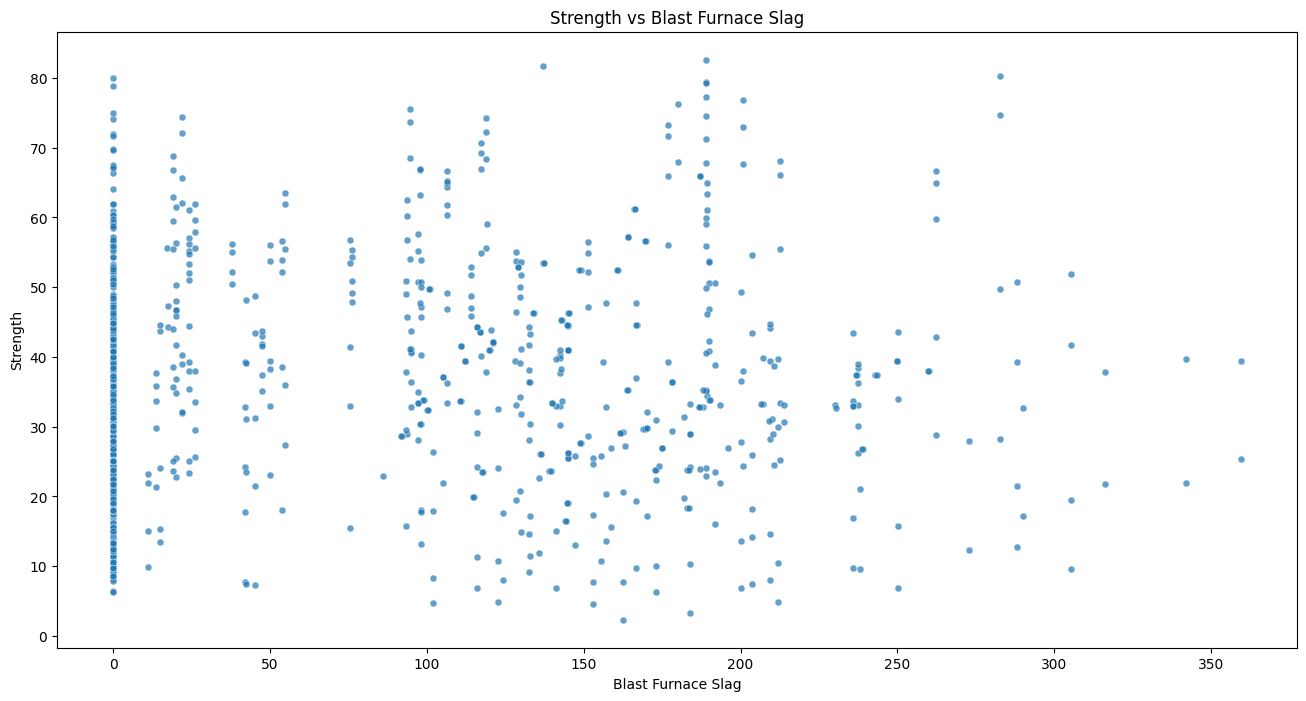

In [90]:
plt.figure(figsize=(16,8))
plt.title('Strength vs Blast Furnace Slag')
sns.scatterplot(data=cement_df, x='Blast Furnace Slag', y=cement_df['Strength'], alpha=0.7, s=25);

In [91]:
fig = px.histogram(cement_df,
                   x=cement_df['Age'],
                   marginal='box',
                   nbins=50,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

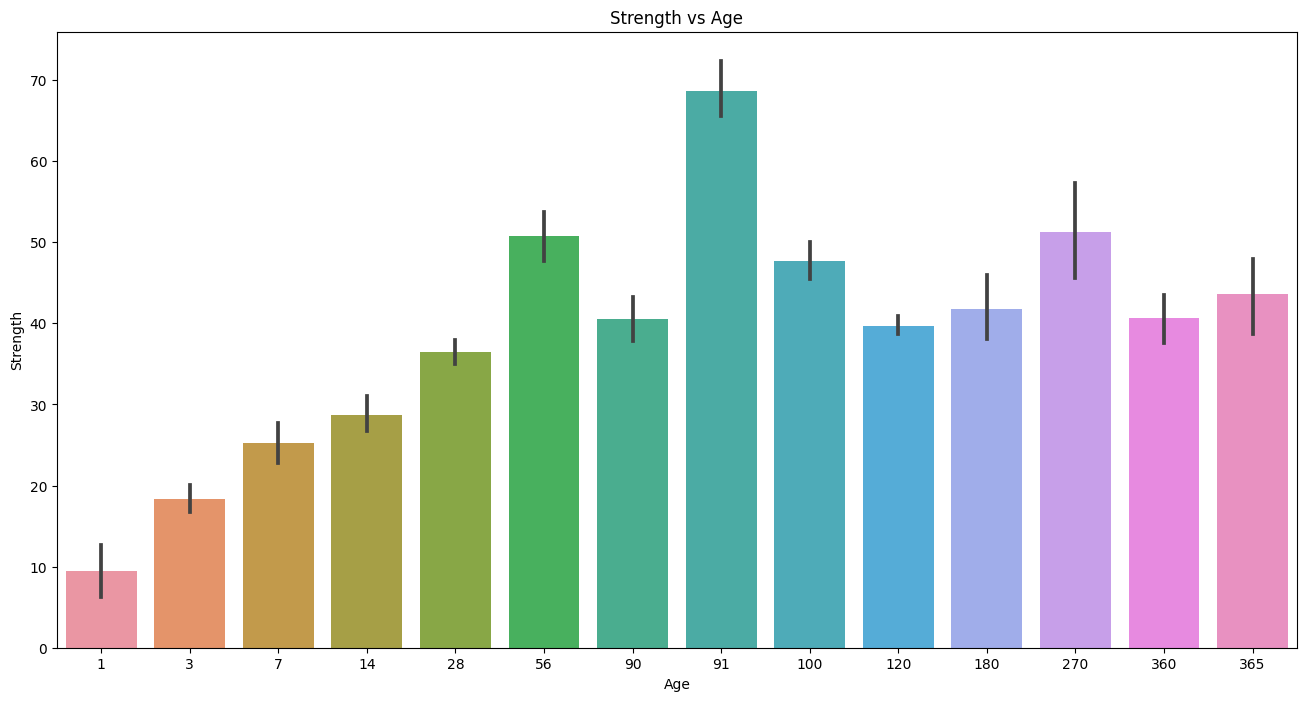

In [92]:
plt.figure(figsize=(16,8))
plt.title('Strength vs Age')
sns.barplot(data=cement_df, x='Age', y='Strength');

In [93]:
fig = px.histogram(cement_df,
                   x=cement_df['Coarse Aggregate'],
                   marginal='box',
                   nbins=50,
                   title='Coarse Aggregate')
fig.update_layout(bargap=0.1)
fig.show()

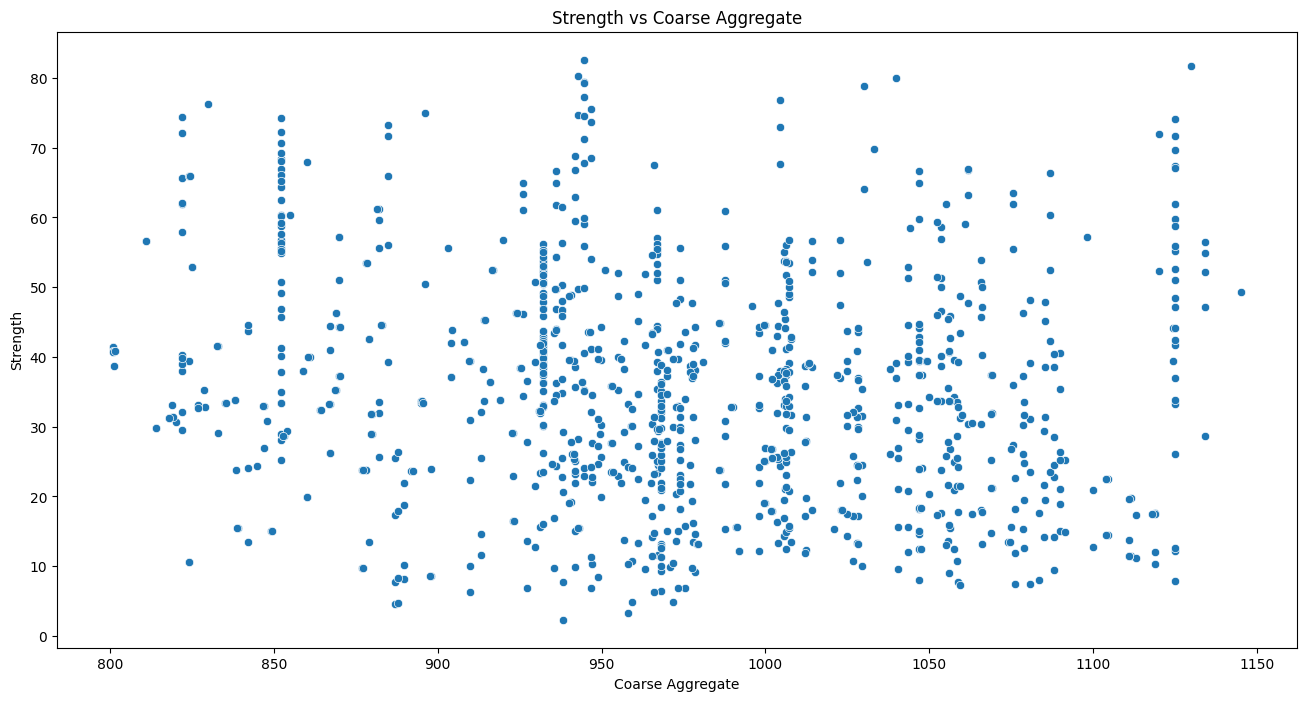

In [94]:
plt.figure(figsize=(16,8))
plt.title('Strength vs Coarse Aggregate')
sns.scatterplot(data=cement_df, x='Coarse Aggregate', y='Strength');

In [95]:
fig = px.histogram(cement_df,
                   x=cement_df['Fine Aggregate'],
                   marginal='box',
                   nbins=50,
                   title='Fine Aggregate')
fig.update_layout(bargap=0.1)
fig.show()

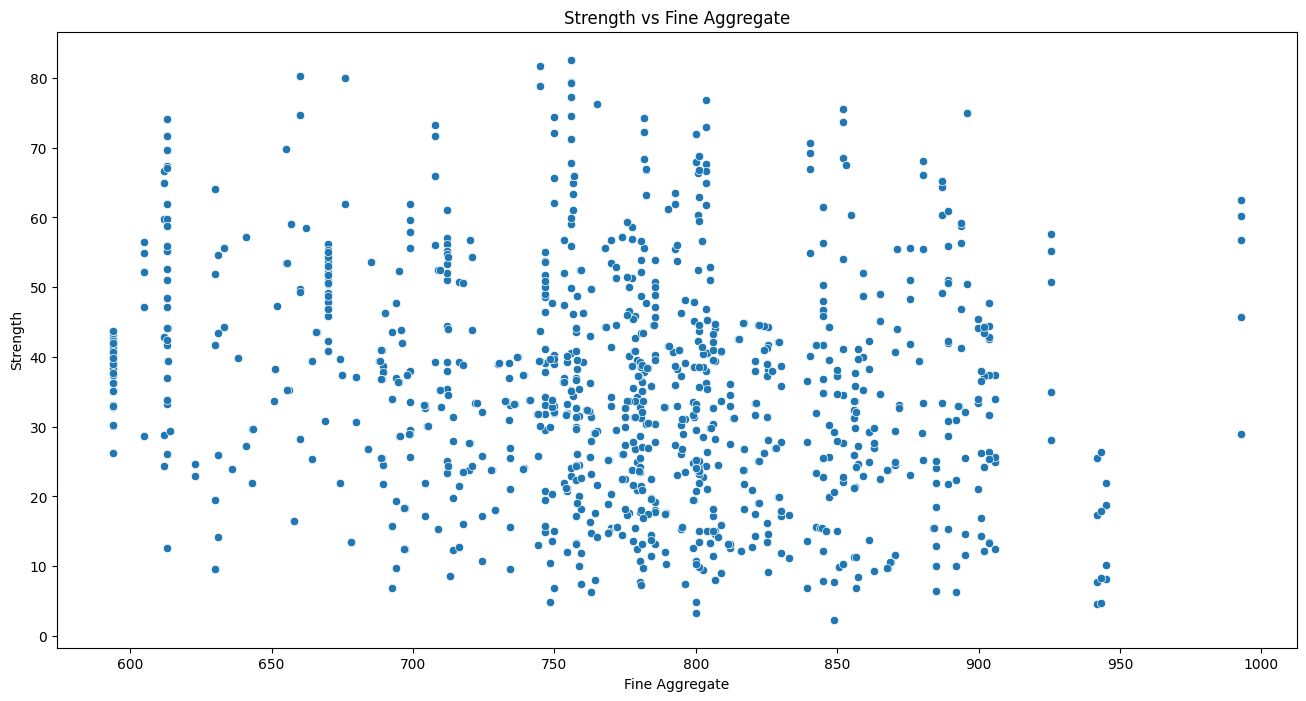

In [96]:
plt.figure(figsize=(16,8))
plt.title('Strength vs Fine Aggregate')
sns.scatterplot(data=cement_df, x='Fine Aggregate', y='Strength');

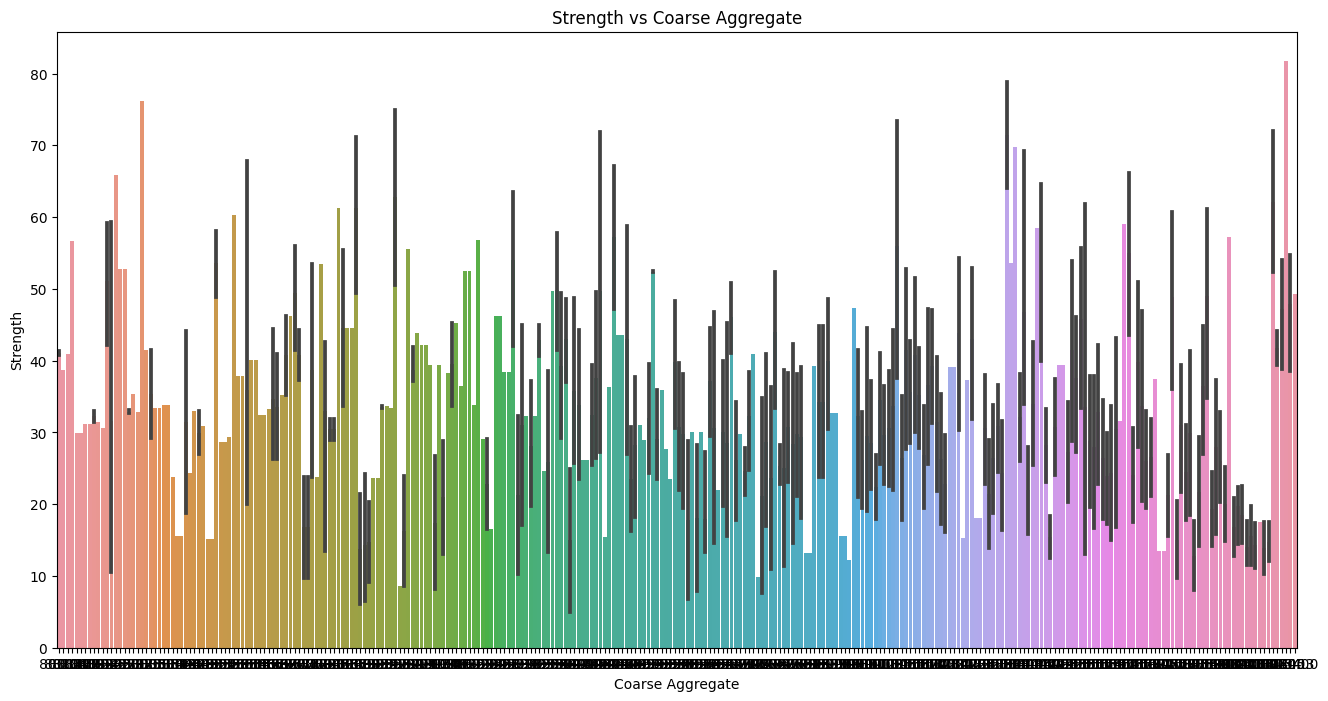

In [97]:
plt.figure(figsize=(16,8))
plt.title('Strength vs Coarse Aggregate')
sns.barplot(data=cement_df, x='Coarse Aggregate', y='Strength', width=0.9);

In [98]:
cement_df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [101]:
train_df = cement_df.drop(columns='Strength', axis=1)
target = cement_df['Strength']

In [103]:
train_df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [104]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [105]:
column = train_df.columns
column

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age'],
      dtype='object')

#Scaling The Numrical Columns By using The StandardScaler

In [109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_df)
train_df[column] = scaler.fit_transform(train_df[column])

In [110]:
train_df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.506116,-0.836471,-0.865375,-0.941235,-0.597131,0.846302,-1.204081,-0.280312
1,2.506116,-0.836471,-0.865375,-0.941235,-0.597131,1.039748,-1.204081,-0.280312
2,0.516516,0.818045,-0.865375,2.153185,-1.019640,-0.546508,-2.225246,3.518569
3,0.516516,0.818045,-0.865375,2.153185,-1.019640,-0.546508,-2.225246,5.009865
4,-0.767375,0.700778,-0.865375,0.465320,-1.019640,0.051885,0.657677,4.931375
...,...,...,...,...,...,...,...,...
1025,-0.021395,0.510363,0.541693,-0.116056,0.484495,-1.344795,-0.054648,-0.280312
1026,0.417755,-0.836471,0.935921,0.652861,0.738001,-2.017987,0.506993,-0.280312
1027,-1.247756,0.782052,0.826846,0.498140,0.011284,-1.057205,0.091055,-0.280312
1028,-1.146118,1.331235,-0.865375,-0.303597,0.890104,0.196324,0.201889,-0.280312


#Split The Dataset Into Train And Test By Using train_test_split function of Sklearn module

In [111]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_df, target, random_state=42, test_size=0.2)
print("x_train.shape", x_train.shape)
print("y_train.shape", y_train.shape)
print("x_test.shape", x_test.shape)
print("y_text.shape", y_test.shape)

x_train.shape (804, 8)
y_train.shape (804,)
x_test.shape (201, 8)
y_text.shape (201,)


#Train The Model By Using Linaer Reagression Algoritm

In [144]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [145]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
kf = KFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(model,train_df, target, cv=kf, n_jobs=-1, scoring='neg_mean_squared_error')
print("score:",score)
print("mean_squre_error:", -1*score.mean())

score: [-125.24564805 -123.2716441   -88.5287651   -91.30282038 -108.48988937]
mean_squre_error: 107.36775340050062


In [146]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
score = cross_val_score(model,train_df, target, cv=kf, n_jobs=-1, scoring='neg_mean_squared_error')
print("score:",score)
print("mean_squre_error:", -1*score.mean())

score: [-117.40901346 -137.87894872 -123.06157567 -120.95870918  -97.25815919
  -77.0210132  -105.61937737  -80.06071213 -103.73053916 -113.26757939]
mean_squre_error: 107.62656274588069


In [150]:
parameters = {  "fit_intercept":[x for x in range(1,10,1)]}
search = GridSearchCV(model, parameters, n_jobs=-1)
search.fit(train_df, target)
best_model = search.best_estimator_
best_model

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:558: FutureWarning:

Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.



LinearRegression(fit_intercept=1)

In [152]:
best_model.fit(x_train, y_train)
kf = KFold(n_splits=15, shuffle=True, random_state=42)
score = cross_val_score(best_model,train_df, target, cv=kf, n_jobs=-1, scoring='neg_mean_squared_error')
print("score:",score)
print("mean_squre_error:", -1*score.mean())

score: [-118.30894522 -130.07142176 -130.92188694 -139.55785959 -102.7703819
 -123.84822582  -98.70763228 -100.86521322  -63.59028345  -80.1758417
 -109.35301942  -83.91685399 -107.85502466 -109.82482572 -109.71885982]
mean_squre_error: 107.29908503272503


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:558: FutureWarning:

Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.



In [157]:
from sklearn.metrics import mean_squared_error
train_preds = best_model.predict(x_train)
train_mean_squre_error = mean_squared_error(train_preds, y_train)

test_preds = best_model.predict(x_test)
test_mean_squre_error = mean_squared_error(test_preds, y_test)

print("Train mean_squre_error:",train_mean_squre_error)
print("Test mean_squre_error:",test_mean_squre_error)


Train mean_squre_error: 100.03589758167782
Test mean_squre_error: 125.2456480505019


In [134]:
from sklearn.linear_model import Ridge, Lasso
def best_estimeter(cls):
  parameters = {
      'alpha':[x/10 for x in range(1,10,1)]
      }
  search = GridSearchCV(cls, parameters, n_jobs=-1)
  search.fit(train_df, target)
  return search.best_estimator_

cls2 = [Ridge(), Lasso()]
for cls in cls2:
  bm = best_estimeter(cls)
  print("best model:", bm)
  bm.fit(x_train, y_train)
  kf = KFold(n_splits=5, shuffle=True, random_state=42)
  scores= cross_val_score(bm, train_df, target, cv=kf, scoring="neg_mean_squared_error")
  print("mean_squared_error:", -1*scores.mean())


best model: Ridge(alpha=0.9)
mean_squared_error: 107.35164624111856
best model: Lasso(alpha=0.1)
mean_squared_error: 107.49398766834852


In [143]:
from sklearn.linear_model import Ridge, Lasso
def best_estimeter(cls):
  parameters = {
      'alpha':[x/10 for x in range(1,10,1)]
      }
  search = GridSearchCV(cls, parameters, n_jobs=-1)
  search.fit(train_df, target)
  return search.best_estimator_

cls2 = [Ridge(), Lasso()]
for cls in cls2:
  bm = best_estimeter(cls)
  print("best model:", bm)
  bm.fit(x_train, y_train)
  kf = KFold(n_splits=6, shuffle=True, random_state=42)
  scores= cross_val_score(bm, train_df, target, cv=kf, scoring="neg_mean_squared_error")
  print("mean_squared_error:", -1*scores.mean())

best model: Ridge(alpha=0.9)
mean_squared_error: 107.2568691523921
best model: Lasso(alpha=0.1)
mean_squared_error: 107.28764055810257


# Now By Using CNN model to predict Cement Strength Regression

In [185]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [212]:
cnn = Sequential()
cnn.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
cnn.add(Dropout(rate = 0.1))
cnn.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
cnn.add(Dropout(rate = 0.1))
cnn.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
cnn.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))

cnn.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
cnn.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
cnn.add(Dense(units = 1))
cnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

cnn.fit(x_train, y_train, batch_size = 50, epochs = 1300,verbose = 0)

mean_sqr_error = cnn.evaluate(x_train, y_train, batch_size=10)
print('Train mean_squre_error:', mean_sqr_error)

mean_sqr_error = cnn.evaluate(x_test, y_test, batch_size=10)
print('Test mean_squre_error:', mean_sqr_error)

81/81 [==============================] - 1s 7ms/step - loss: 39.9293
Train mean_squre_error: 39.92926025390625
21/21 [==============================] - 0s 4ms/step - loss: 57.4320
Test mean_squre_error: 57.4320068359375


#Summary
The Mean SQure Error In the following:
 Linear Regression, Ridge and Lesso is

*  Linear Regression :
        Train mean_squre_error: 100.03589758167782
        Test mean_squre_error: 125.2456480505019
*  Ridge & Lesso:
        best model: Ridge(alpha=0.9)
        mean_squared_error: 107.2568691523921
        best model: Lasso(alpha=0.1)
        mean_squared_error: 107.28764055810257


*   CNN MODEL:
        Train mean_squre_error: 39.92926025390625
        Test mean_squre_error: 57.4320068359375


So Here CNN Model is the best model for predict the Strength of Cement as compared to Linear Regression, lesso and Ridge because it mean square error is less than linear, Lesso and Ridge


